## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
from functools import reduce
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
df=pd.read_csv('students-data.csv',delimiter=";")

In [3]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
df.shape


(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [6]:
# checking for any missing values
df.isna().sum().any()

False

In [7]:
#There are no missing values

In [8]:
#checking for null values
df.isnull().sum().any()

False

In [9]:
#there are not null values

In [10]:
#Set the index name of the dataframe to "number"

df.index.name = 'number'

In [11]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [12]:
df.select_dtypes(include=['object']).columns # same thing can be achieved with statement in the next cell

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [13]:
df.select_dtypes(include=['object','category'],exclude=['int64']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [14]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [15]:
# Shape before dropping
df.shape 

(395, 33)

In [16]:
#Dropping columns with variance less than 1.0

for columns in df.select_dtypes(include=['int64']).columns:
    print(columns,df[columns].var())
    if df[columns].var()<1.0:
        df.drop(columns,axis=1, inplace=True)
    

age 1.6282850350189455
Medu 1.1984450298785598
Fedu 1.184180427938061
traveltime 0.4865128831202245
studytime 0.704324359056738
failures 0.553016770545522
famrel 0.8039966587418893
freetime 0.9977253742851635
goout 1.2393882927456121
Dalc 0.7934202917175335
Walc 1.6586776328471353
health 1.9329435198869143
absences 64.04954057700951
G1 11.017053267364899
G2 14.148917303861756
G3 20.989616397866737


In [17]:
#Shape after dropping
df.shape 

(395, 27)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [18]:
df.select_dtypes(include=['object']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [19]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [20]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [21]:
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))


In [22]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [23]:
#making a copy of the dataframe for relationship analysis in question 7

df1= df.copy()

#converting G1,G2,G3 values to binary
df.loc[df['G1'] < 10, 'G1'] = 0
df.loc[df['G1'] >= 10, 'G1'] = 1


df.loc[df['G2'] < 10, 'G2'] = 0
df.loc[df['G2'] >= 10, 'G2'] = 1



df.loc[df['G3'] < 10, 'G3'] = 0
df.loc[df['G3'] >= 10, 'G3'] = 1


In [24]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [25]:
X =  df.loc[:, df.columns != 'G3']
y =  df.loc[:, df.columns == 'G3']


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

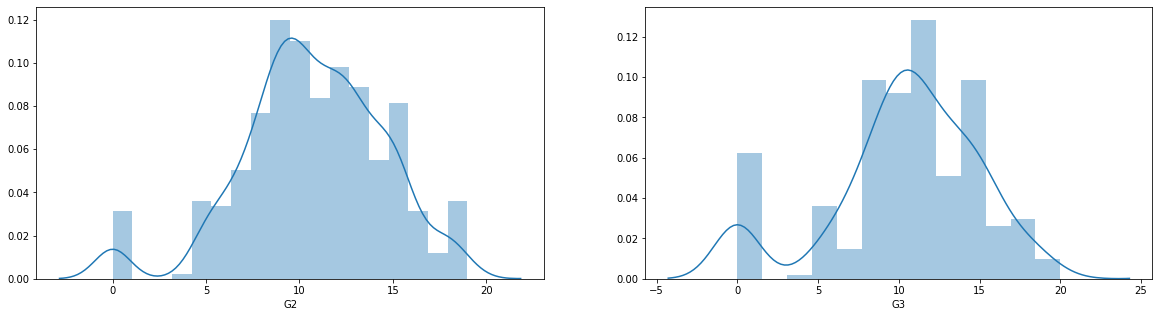

In [26]:
fg, axs = plt.subplots(1, 2, figsize=(20, 5))
g2 = sns.distplot(df1['G2'], ax=axs[0])
g3 = sns.distplot(df1['G3'], ax=axs[1])

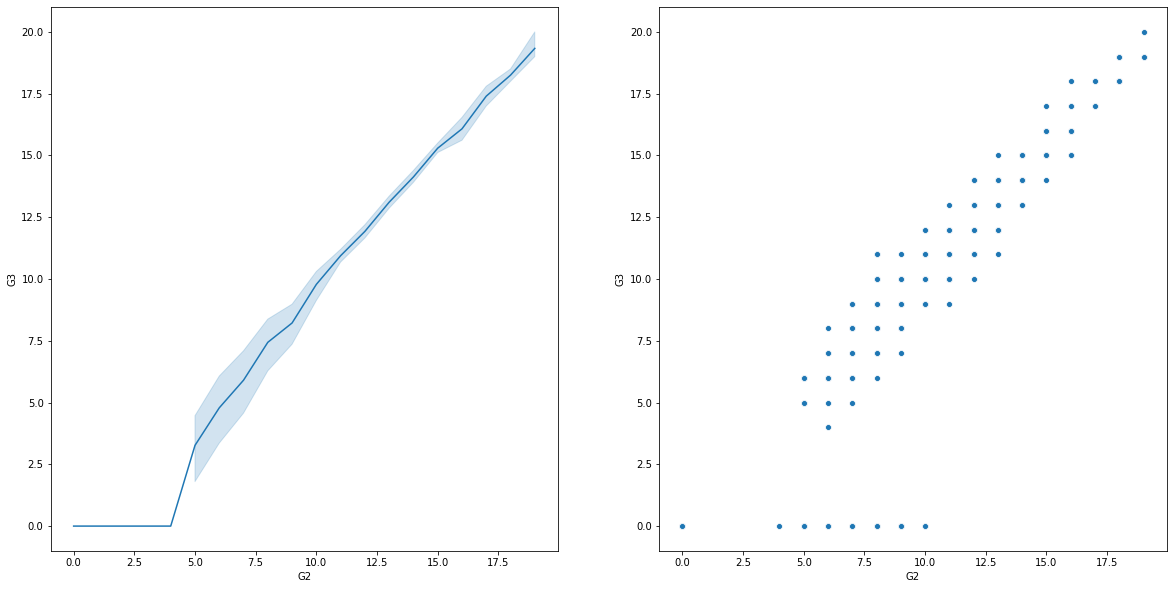

In [27]:
fg, axs = plt.subplots( 1,2,figsize=(20,10))
b3 = sns.lineplot(x='G2', y='G3', data=df1,ax=axs[0])
b4 = sns.scatterplot(x='G2', y='G3', data=df1,ax=axs[1])

There is a linear relation between G2&G3

Text(0.5, 1.0, 'Correlation Heatmap')

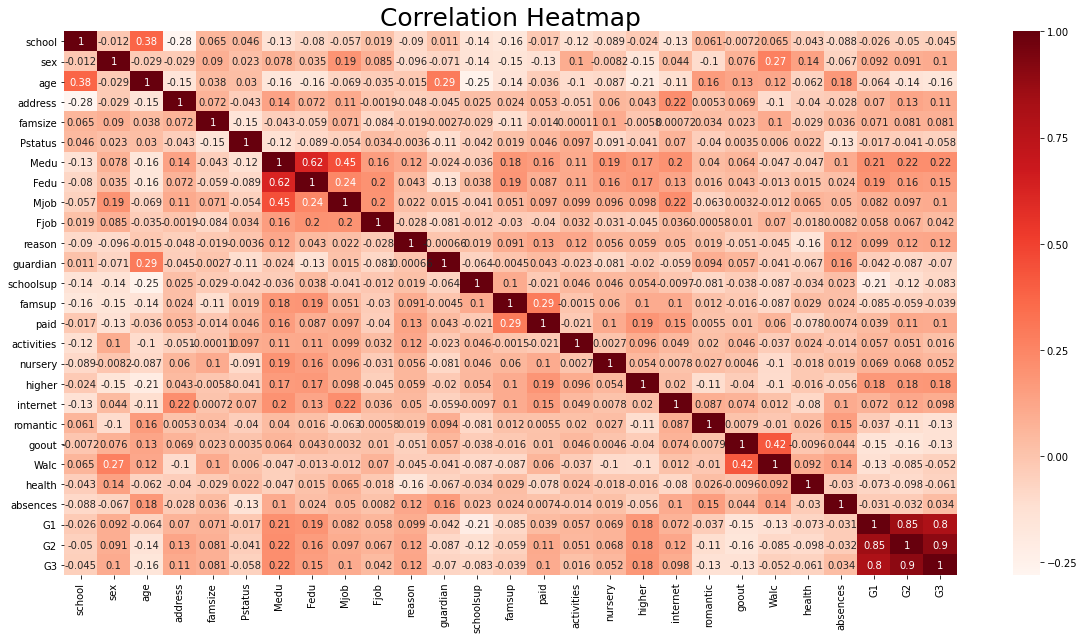

In [28]:
#Further using heatmap to check the correlation 
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=25)

In [29]:
# from the head map its clear that G2 and G3 are highly correlated

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [30]:
df1['school'].value_counts()

0    349
1     46
Name: school, dtype: int64

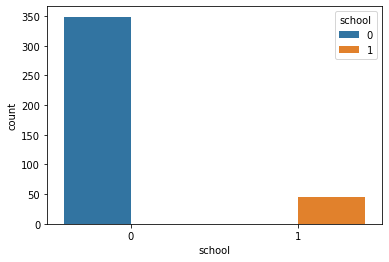

In [31]:
sns.countplot(x='school', hue='school', data=df1)

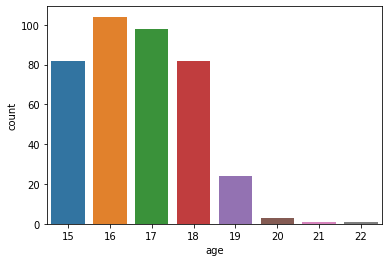

In [32]:
sns.countplot(x='age',data=df1)

In [33]:
df1['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

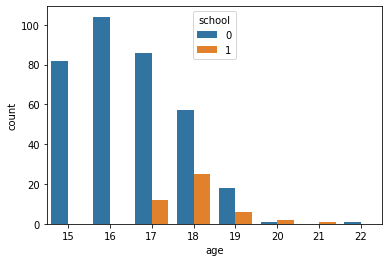

In [34]:
sns.countplot(x='age', hue='school',data=df1)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [35]:
train_set, test_set, train_labels, test_labels = train_test_split(X,y,train_size=300,random_state=1)
train_set.shape

(300, 26)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [36]:
model = LogisticRegression()
model.fit(train_set, train_labels)
y_predict = model.predict(test_set)
test_model_score = model.score(test_set , test_labels)
train_model_score = model.score(train_set , train_labels)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:

print("Score for trianing set is ", train_model_score)
print("Score for test set is ", test_model_score)


Score for trianing set is  0.9333333333333333
Score for test set is  0.9052631578947369


In [38]:
print(metrics.confusion_matrix(test_labels, y_predict))
print(metrics.classification_report(test_labels, y_predict))

[[25  3]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



# Naive bayes with Iris data

### Import Iris.csv

In [39]:
#Load the data set
df_iris=pd.read_csv('Iris.csv')

In [40]:
df_iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [41]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
print(df_iris.shape) #prints no. of row and columns

print(df_iris.columns) #prints name of columns
df_iris["Species"].value_counts()


(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [43]:

#Spliting the dataset in independent and dependent variables
X = df_iris.iloc[:,:4].values
y = df_iris['Species'].values

### Find the distribution of target variable (Class)

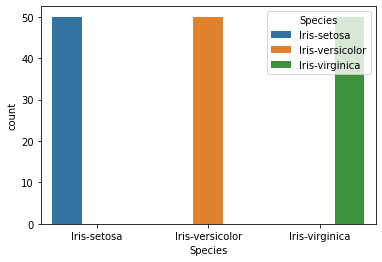

In [44]:
sns.countplot(x='Species', hue='Species', data=df_iris)

### Plot the distribution of target variable using histogram

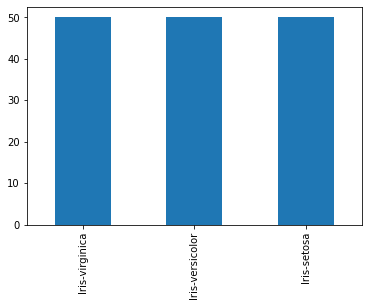

In [45]:
pd.value_counts(df_iris["Species"]).plot(kind="bar")

In [46]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

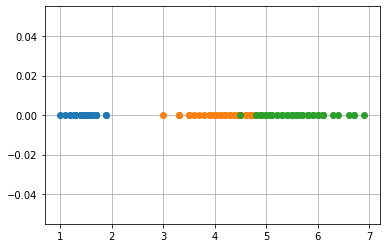

In [47]:
iris_setso = df_iris.loc[df_iris["Species"] == "Iris-setosa"];
iris_virginica = df_iris.loc[df_iris["Species"] == "Iris-virginica"];
iris_versicolor = df_iris.loc[df_iris["Species"] == "Iris-versicolor"];
plt.plot(iris_setso["PetalLengthCm"],np.zeros_like(iris_setso["PetalLengthCm"]), 'o')
plt.plot(iris_versicolor["PetalLengthCm"],np.zeros_like(iris_versicolor["PetalLengthCm"]), 'o')
plt.plot(iris_virginica["PetalLengthCm"],np.zeros_like(iris_virginica["PetalLengthCm"]), 'o')
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Scatter plot')

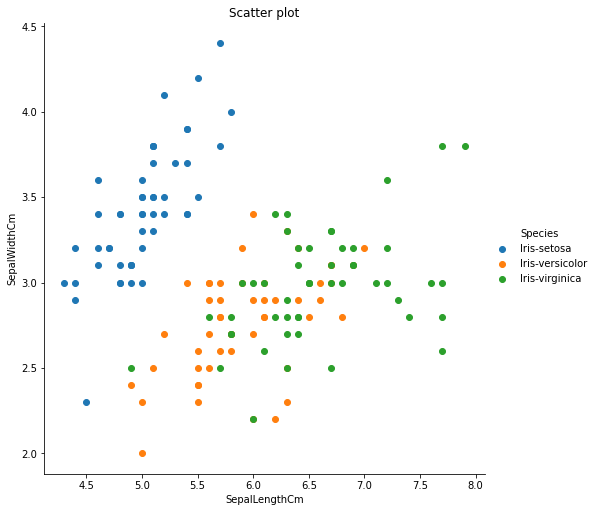

In [48]:

#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(df_iris, hue="Species", size=7) .map(plt.scatter,"SepalLengthCm", "SepalWidthCm", )  .add_legend()
plt.title('Scatter plot')


### Summary Statistics and explain insights for at least 2 variables

In [49]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
# #SepalWidthCm
# mean>median
# median - min = 1
# max - median = 1.4

# distribution for SepalWidthCm is righ skewed


In [51]:
# #PetalLengthCm
# mean<median
# median - min = 3.35
# max - median = 2.55

# distribution for 'PetalLengthCm' is left skewed

In [52]:
# #SepalWidthCm
# mean<median
# median - min = 1.2
# max - median = 1.2

# Distribution is approximately normal distribution

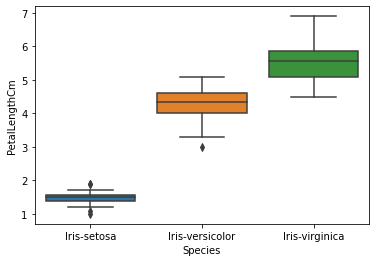

In [53]:
sns.boxplot(x="Species",y="PetalLengthCm", data=df_iris)
plt.show()

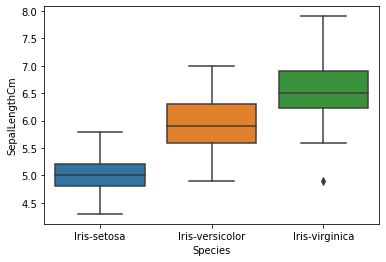

In [54]:
sns.boxplot(x="Species",y="SepalLengthCm", data=df_iris)
plt.show()

### Correlation among all variables and give your insights

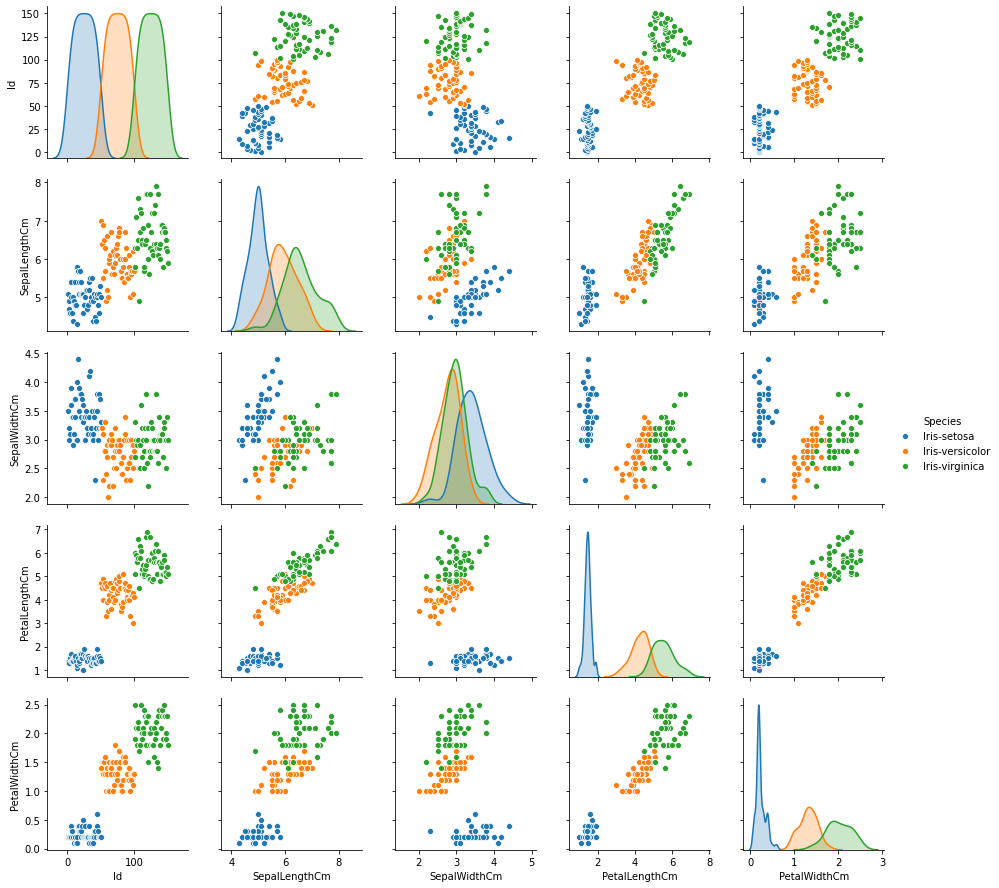

In [55]:
sns.pairplot(df_iris , hue='Species' , diag_kind = 'kde')

### Observations from the above graphs

In [56]:
df_iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Split data in Training and Validation in 80:20

In [57]:
df_iris.drop(labels= 'SepalWidthCm',axis=1,inplace = True)
train_set, test_set, train_labels, test_labels = train_test_split(X,y,test_size=.2,random_state=1)


In [58]:
#training set before scaling
train_set 

array([[ 92. ,   6.1,   3. ,   4.6],
       [136. ,   7.7,   3. ,   6.1],
       [ 70. ,   5.6,   2.5,   3.9],
       [129. ,   6.4,   2.8,   5.6],
       [115. ,   5.8,   2.8,   5.1],
       [ 49. ,   5.3,   3.7,   1.5],
       [ 54. ,   5.5,   2.3,   4. ],
       [ 29. ,   5.2,   3.4,   1.4],
       [ 55. ,   6.5,   2.8,   4.6],
       [109. ,   6.7,   2.5,   5.8],
       [113. ,   6.8,   3. ,   5.5],
       [ 18. ,   5.1,   3.5,   1.4],
       [120. ,   6. ,   2.2,   5. ],
       [104. ,   6.3,   2.9,   5.6],
       [ 59. ,   6.6,   2.9,   4.6],
       [119. ,   7.7,   2.6,   6.9],
       [ 19. ,   5.7,   3.8,   1.7],
       [  5. ,   5. ,   3.6,   1.4],
       [ 46. ,   4.8,   3. ,   1.4],
       [ 60. ,   5.2,   2.7,   3.9],
       [ 40. ,   5.1,   3.4,   1.5],
       [ 37. ,   5.5,   3.5,   1.3],
       [118. ,   7.7,   3.8,   6.7],
       [140. ,   6.9,   3.1,   5.4],
       [108. ,   7.3,   2.9,   6.3],
       [133. ,   6.4,   2.8,   5.6],
       [127. ,   6.2,   2.8,   4.8],
 

### Do Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
train_set = scaler.fit_transform(train_set.reshape(-1, train_set.shape[-1])).reshape(train_set.shape)
test_set = scaler.transform(test_set.reshape(-1, test_set.shape[-1])).reshape(test_set.shape)


In [60]:
#training set after scaling
train_set 

array([[ 0.34899193,  0.31553662, -0.03612186,  0.44748582],
       [ 1.34449565,  2.2449325 , -0.03612186,  1.29803965],
       [-0.14875993, -0.2873996 , -1.240184  ,  0.0505607 ],
       [ 1.18612006,  0.67729835, -0.51774672,  1.01452171],
       [ 0.86936888, -0.04622511, -0.51774672,  0.73100376],
       [-0.62388671, -0.64916132,  1.64956512, -1.31032543],
       [-0.51076129, -0.40798684, -1.72180885,  0.10726429],
       [-1.0763884 , -0.76974857,  0.92712784, -1.36702901],
       [-0.4881362 ,  0.79788559, -0.51774672,  0.44748582],
       [ 0.73361837,  1.03906007, -1.240184  ,  1.12792888],
       [ 0.82411871,  1.15964732, -0.03612186,  0.95781812],
       [-1.32526433, -0.89033581,  1.16794027, -1.36702901],
       [ 0.9824943 ,  0.19494938, -1.96262128,  0.67430017],
       [ 0.62049295,  0.5567111 , -0.27693429,  1.01452171],
       [-0.39763586,  0.91847283, -0.27693429,  0.44748582],
       [ 0.95986922,  2.2449325 , -0.99937157,  1.75166836],
       [-1.30263925, -0.

### Train and Fit NaiveBayes Model

In [61]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [62]:
trainaccuracy  = naive_model.score(train_set, train_labels)
testAccuracy  = naive_model.score(test_set,test_labels)
print ("Training set score ",trainaccuracy)
print ("Test set score ", testAccuracy)

Training set score  0.9916666666666667
Test set score  1.0


In [63]:
test_pred = naive_model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [64]:
# Cross validaton

In [65]:
from sklearn.model_selection import cross_val_score, cross_val_predict


scores = cross_val_score(naive_model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [1.         1.         1.         1.         1.         1.
 1.         1.         0.90909091 1.        ] [1.         1.         1.         1.         1.         1.
 1.         1.         0.90909091 1.        ]
Average score: 0.9909090909090909


In [66]:
# #Findings

# Feature scaling doesnt affect the accuracy of the model
# from the cross validation we can conclude that the model will be 99% accurate in judging the flower type
